In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import inv, det
from scipy.optimize import least_squares

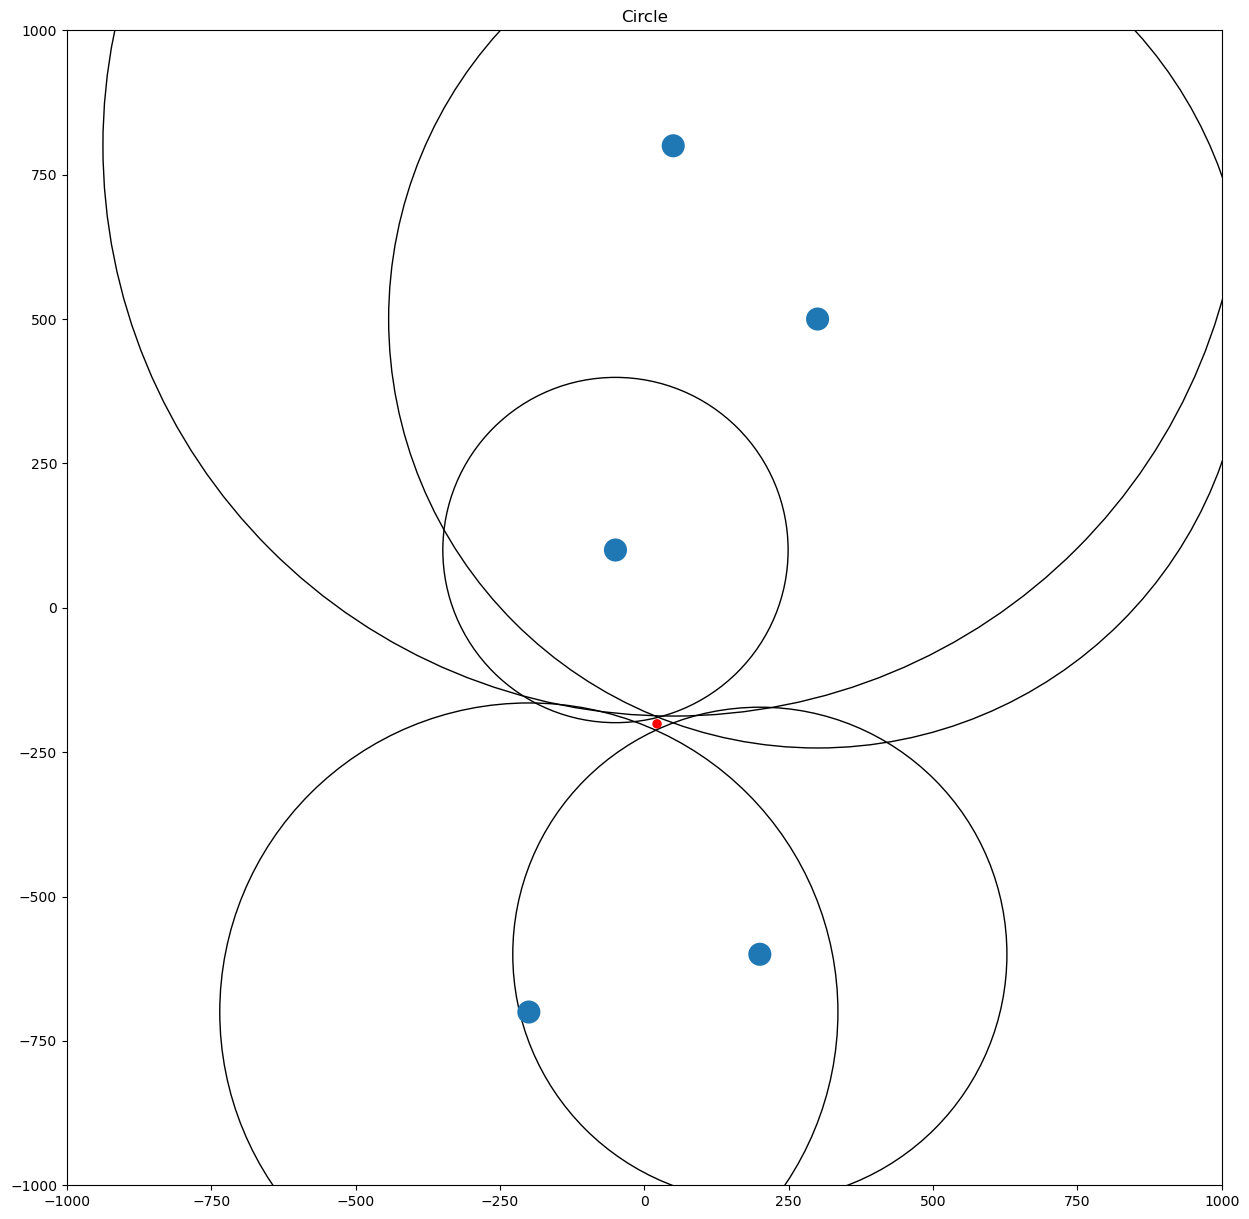

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import inv, det
import math

cords = np.array([(-50, 100), (300, 500), (-200, -700), (200, -600), (50, 800)])
dist = np.array([298.9468,742.7760,535.1911,427.8247,987.5056])

f, axes = plt.subplots()
f.set_figwidth(15)
f.set_figheight(15)
cir_1 = plt.Circle((-50., 100.),298.9468,fill = False )
cir_2 = plt.Circle((300., 500.),742.7760,fill = False )
cir_3 = plt.Circle((-200., -700.),535.1911,fill = False )
cir_4 = plt.Circle((200., -600.),427.8247,fill = False )
cir_5 = plt.Circle((50., 800.),987.5056,fill = False )

 
axes.set_aspect(1)
axes.add_artist(cir_1)
axes.add_artist(cir_2)
axes.add_artist(cir_3)
axes.add_artist(cir_4)
axes.add_artist(cir_5)

plt.title( 'Circle' )
plt.xlim(-1000 , 1000 )
plt.ylim(-1000 , 1000 )

axes.add_artist(plt.Circle((-50., 100.), 20))
axes.add_artist(plt.Circle((300., 500.), 20))
axes.add_artist(plt.Circle((-200., -700.), 20))
axes.add_artist(plt.Circle((200., -600.), 20))
axes.add_artist(plt.Circle((50., 800.), 20))
axes.add_artist(plt.Circle((22., -201.), 7,color="red"))
plt.show()


Оценка координат приемника: (x0= 23.37, y0= -197.40, tau= 1.00)


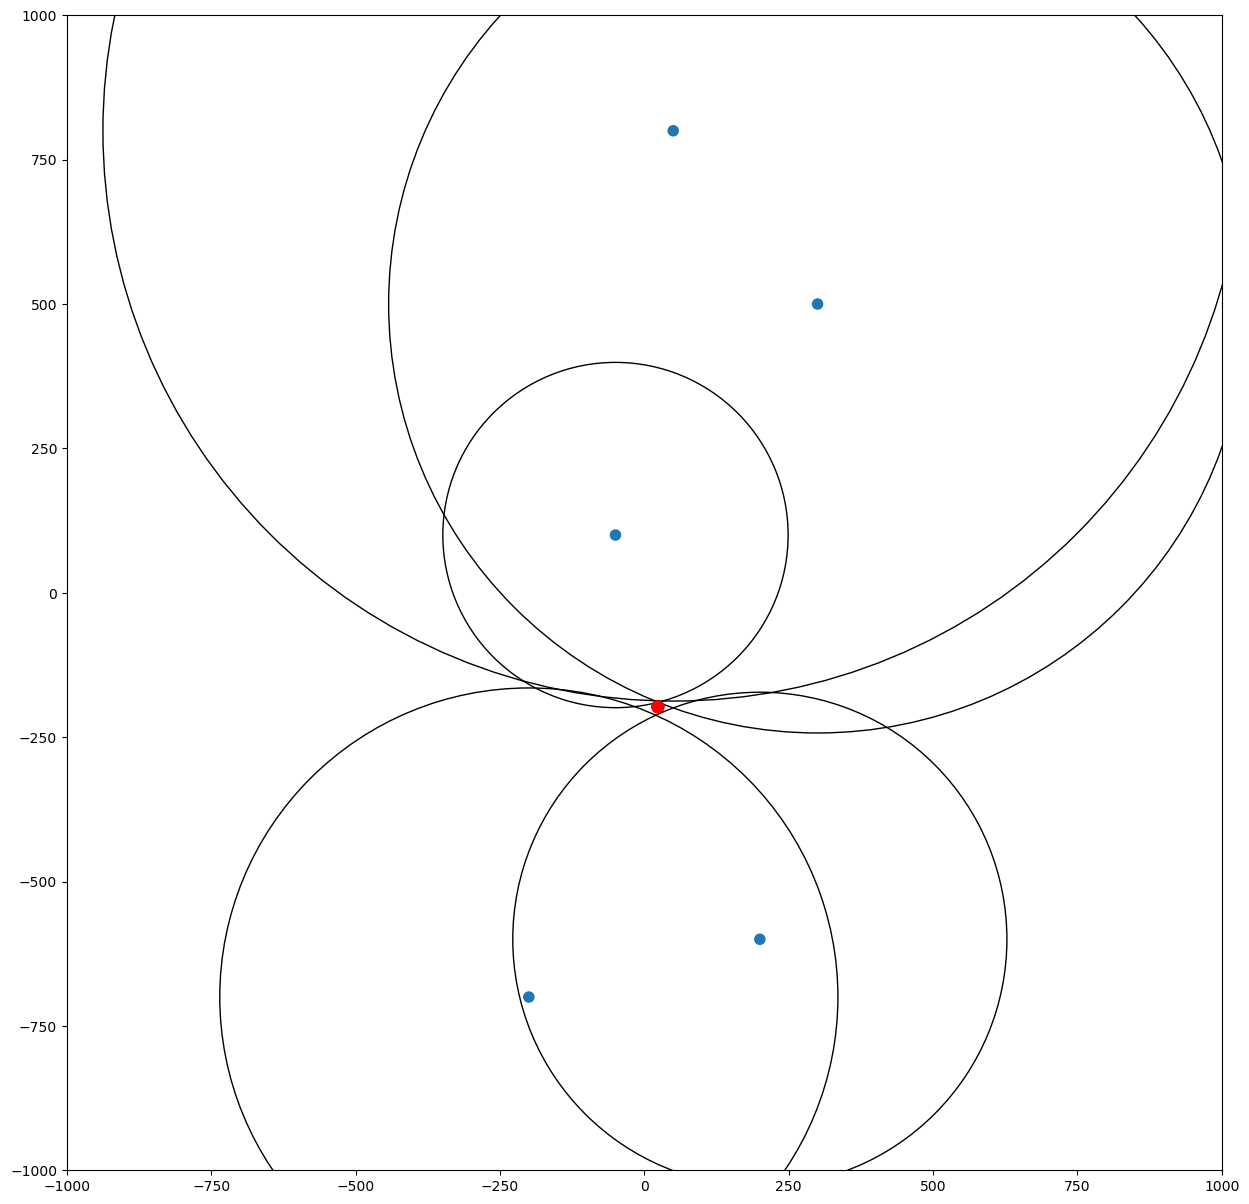

In [3]:
f, axes = plt.subplots()
f.set_figwidth(15)
f.set_figheight(15)

plt.xlim(-1000 , 1000 )
plt.ylim(-1000 , 1000 )
axes.set_aspect(1)
def calc_z(prob, dist, cords):
    x0, y0, tau = prob
    t = len(dist)
    z = np.zeros(t)
    for i in range(t):
        z[i] = dist[i] - np.sqrt((cords[i][0] - x0)**2 + (cords[i][1] - y0)**2)
    return z


x0,y0,tau = 0,0,1
prob = [x0, y0, tau]
dist = np.array([ 298.9468,742.7760, 535.1911,427.8247, 987.5056])
cords = [(-50, 100), (300, 500), (-200, -700), (200, -600), (50, 800)]


result = least_squares(calc_z, prob, args=(dist, cords))


est_x = result.x

print("Оценка координат приемника: (x0= {:.2f}, y0= {:.2f}, tau= {:.2f})".format(est_x[0], est_x[1], est_x[2]))


for i in range(len(dist)):
    x_c = cords[i][0]
    y_c = cords[i][1]
    cir = plt.Circle((x_c, y_c),dist[i],fill = False )
    axes.add_artist(cir)
    axes.add_artist(plt.Circle((x_c, y_c), 10))
    axes.add_artist(plt.Circle((est_x[0], est_x[1]), 10,color='red'))


Оценка координат приемника: (x0= 28.55, y0= -199.95, tau= 1.00)
Оценка координат приемника: (x0= 16.41, y0= -199.68, tau= 1.00)
Оценка координат приемника: (x0= 41.37, y0= -192.49, tau= 1.00)
Оценка координат приемника: (x0= 3.04, y0= -191.50, tau= 1.00)
Оценка координат приемника: (x0= 23.48, y0= -200.34, tau= 1.00)


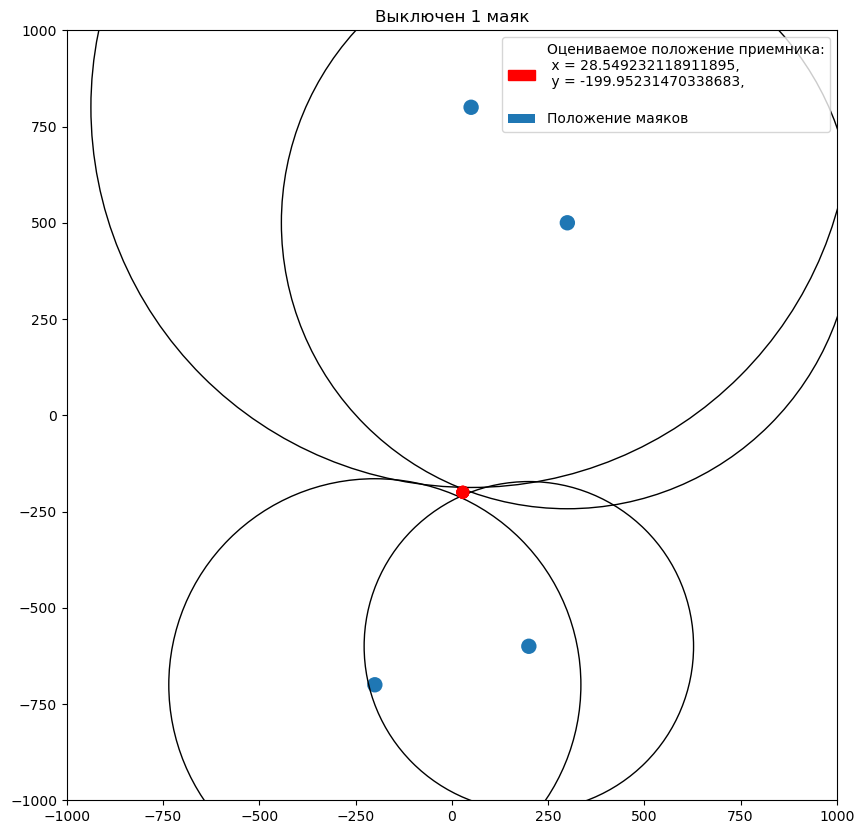

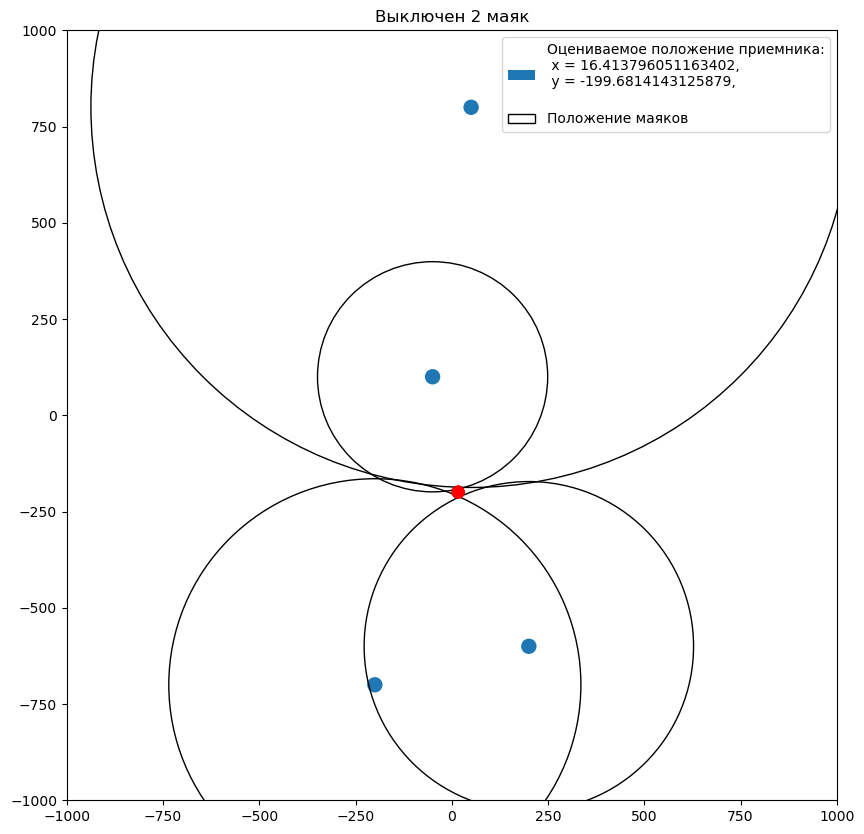

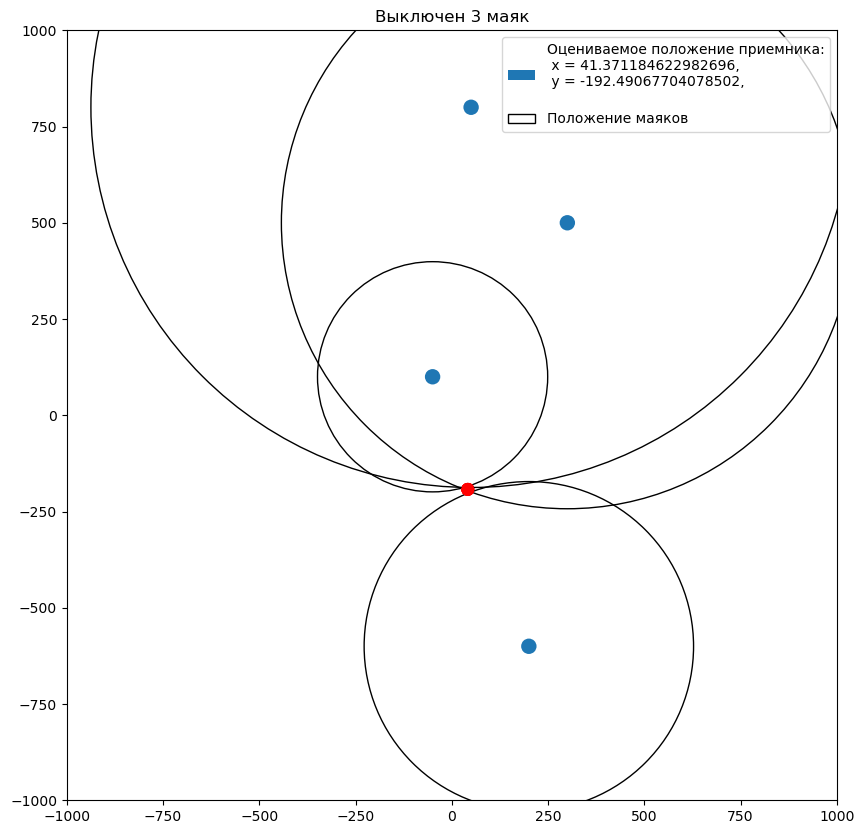

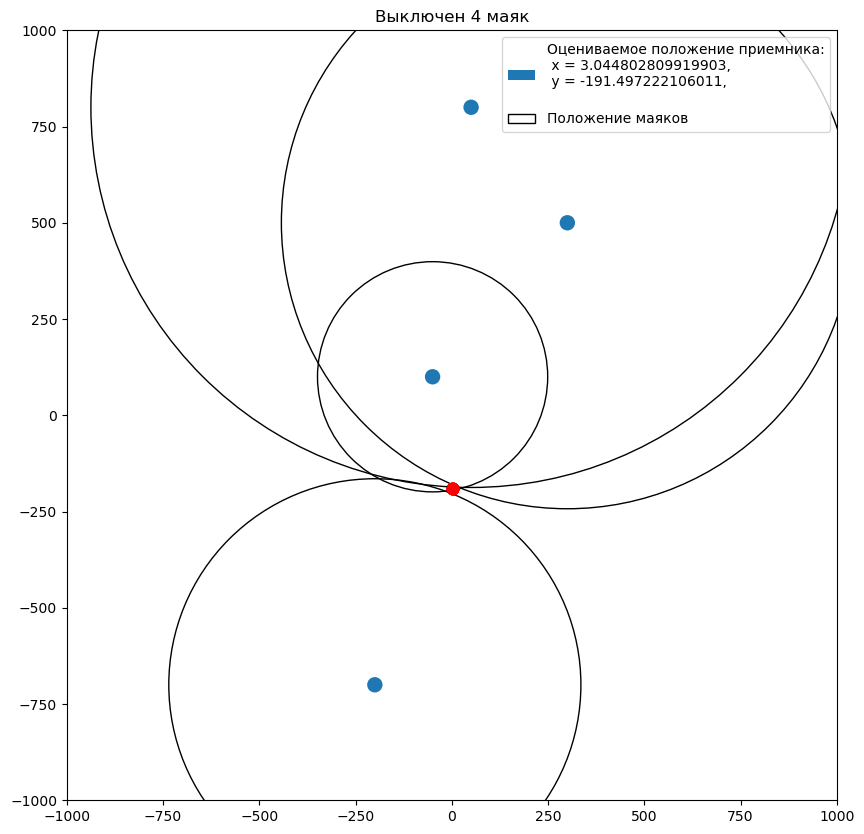

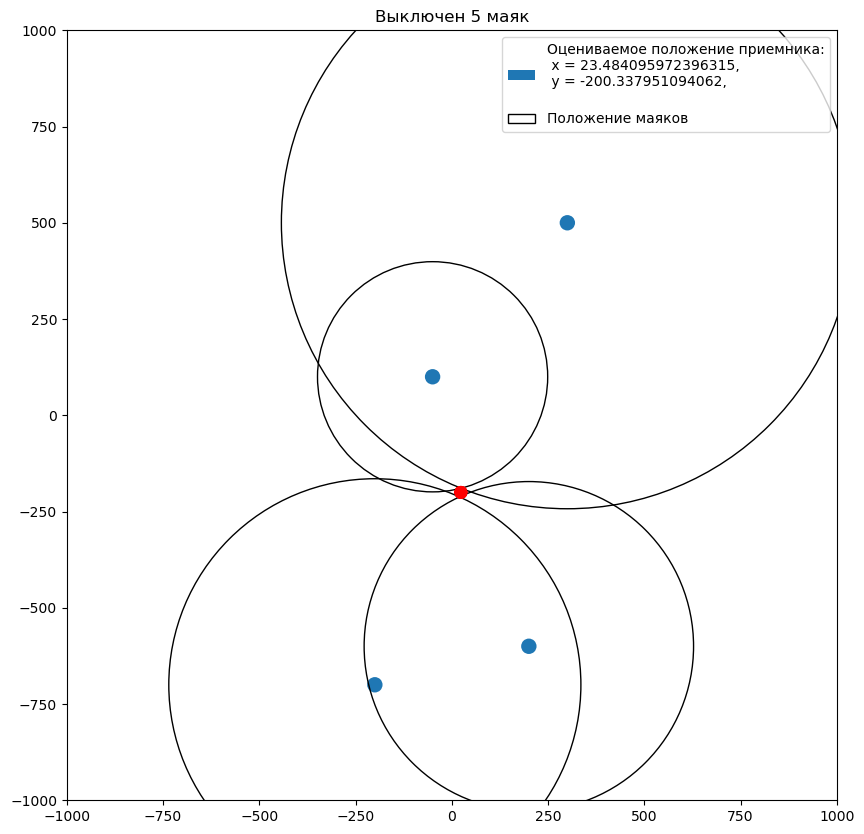

In [4]:
def calc_z(prob, dist, cords):
    x0, y0, tau = prob
    t = len(dist)
    z = np.zeros(t)
    for i in range(t):
        z[i] = dist[i] - np.sqrt((cords[i][0] - x0)**2 + (cords[i][1] - y0)**2)
    #print(z)
    return z

x0,y0,tau = 0,0,1
prob = [x0, y0, tau]
dist = np.array([ 298.9468,742.7760, 535.1911,427.8247, 987.5056])
cords = [(-50, 100), (300, 500), (-200, -700), (200, -600), (50, 800)]

new = []
dist2,cords2 = [],[]
m_vec = []
for i in range(5):
    dist2,cords2=np.copy(dist),np.copy(cords)
    dist2,cords2=np.delete(dist2,i),np.delete(cords2,i,axis=0)

    #print(distt)#
    result = least_squares(calc_z, prob, args=(dist2, cords2))
    m = result.x
    m_vec.append(m)
    print("Оценка координат приемника: (x0= {:.2f}, y0= {:.2f}, tau= {:.2f})".format(m[0], m[1], m[2]))

for i in range(len(cords)):
    f, axes = plt.subplots()
    f.set_figwidth(10)
    f.set_figheight(10)
    axes.set_xlim(-1000, 1000)
    axes.set_ylim(-1000, 1000)
    axes.set_aspect(1)

    for j in range(len(cords)):
        if j!=i:#маяки
            axes.add_artist(plt.Circle((cords[j][0], cords[j][1]), 20))
            cir = plt.Circle((cords[j][0], cords[j][1]), dist[j], fill=False)
            axes.add_artist(cir)
                    # Настройка пределов осей
    
        axes.add_artist(plt.Circle((m_vec[i][0], m_vec[i][1]), 15, color='red')) #примерные координаты

    axes.set_title('Выключен {} маяк'.format(i+1))
    axes.legend(['Оцениваемое положение приемника:\n x = {},\n y = {},\n'.format(m_vec[i][0],m_vec[i][1]),'Положение маяков'])

    plt.savefig('my_plots_scipy {}.png'.format(i))

# Показать графики
    plt.show()

Оценка координат приемника: (x0= 7.41, y0= -197.65)
Оценка координат приемника: (x0= 37.37, y0= -198.95)
Оценка координат приемника: (x0= 26.38, y0= -199.69)
Оценка координат приемника: (x0= 25.62, y0= -200.32)
Оценка координат приемника: (x0= 22.26, y0= -203.71)


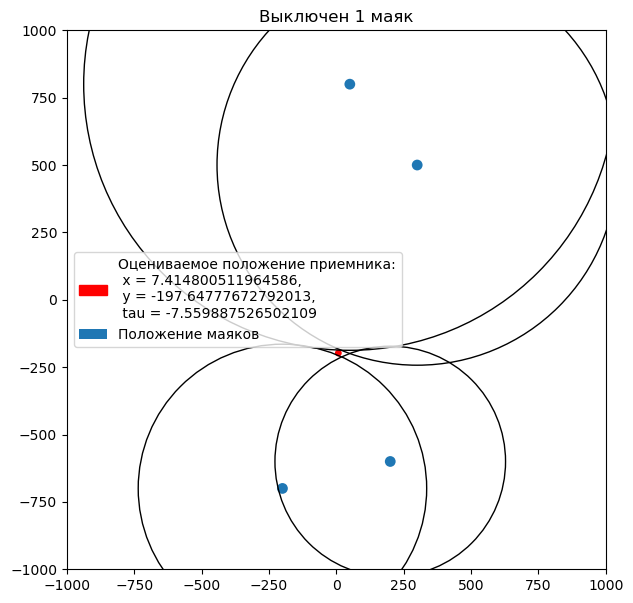

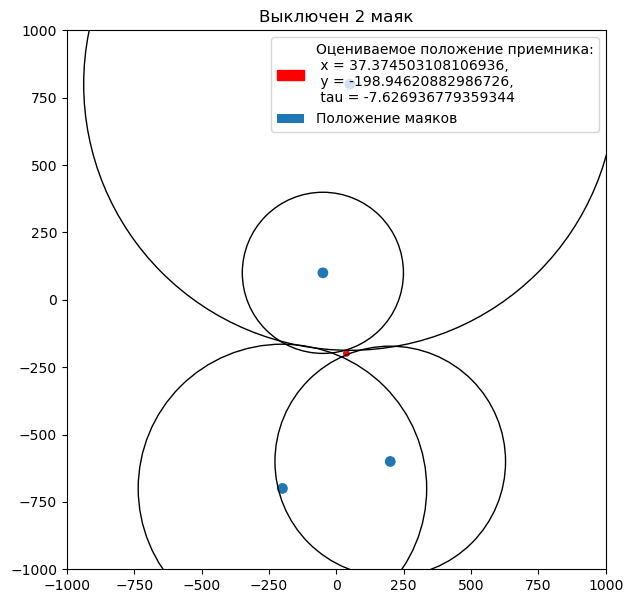

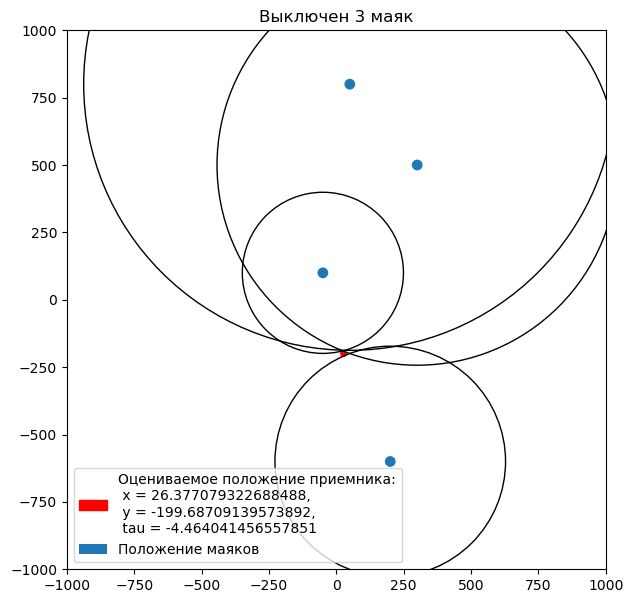

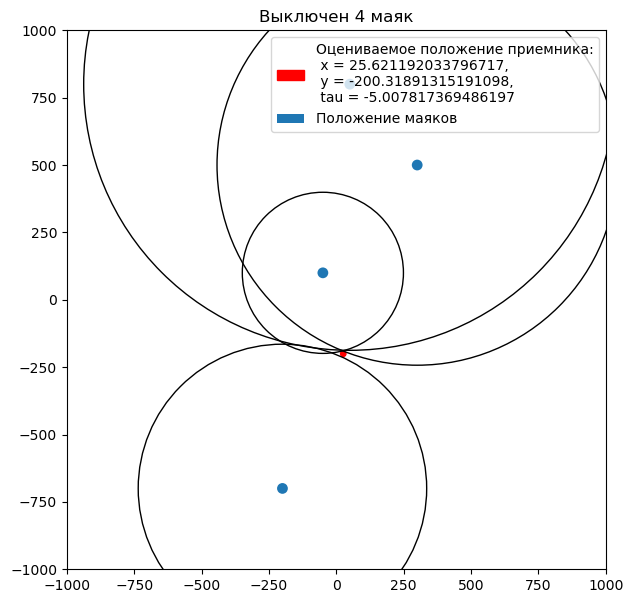

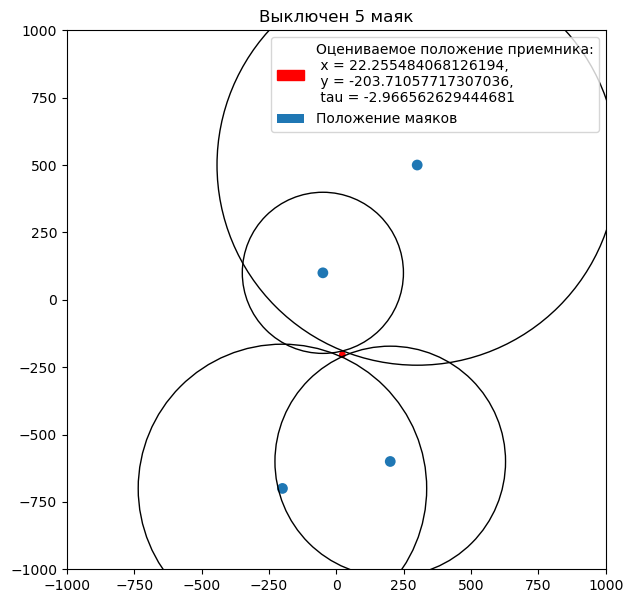

0

In [9]:
dist = np.array([ 298.9468,742.7760, 535.1911,427.8247, 987.5056])
cords = [(-50, 100), (300, 500), (-200, -700), (200, -600), (50, 800)]
x0,y0,tau = 1,1,1
dist2,cords2 = [],[]
est_vec = []
noise=np.array([0.1,0.2,0.3,0.1])
def draw(est_vec=est_vec,cords=cords,dist=dist):    
    for i in range(len(cords)):
        f, axes = plt.subplots()
        f.set_figwidth(7)
        f.set_figheight(7)
        axes.add_artist(plt.Circle((est_vec[i][0], est_vec[i][1]), 10, color='red')) #примерные координаты
        axes.set_xlim(-1000, 1000)
        axes.set_ylim(-1000, 1000)
        axes.set_aspect(1)

        for j in range(len(cords)):
            if j!=i:
                axes.add_artist(plt.Circle((cords[j][0], cords[j][1]), 20))
                cir = plt.Circle((cords[j][0], cords[j][1]), dist[j], fill=False)
                axes.add_artist(cir)
                    # Настройка пределов осей
        axes.set_title('Выключен {} маяк'.format(i+1))

        axes.legend(['Оцениваемое положение приемника:\n x = {},\n y = {},\n tau = {}'.format(est_vec[i][0],est_vec[i][1],est_vec[i][2]),'Положение маяков'])

        plt.savefig('my_plots_my_func {}.png'.format(i))

    # Показать графики
    plt.show()
    return 0


def pred_coords(x0, y0, tau, dist, cords, noise):
    t = len(dist)
    z, H = np.array([]), np.array([[]])
    R = np.diag(noise)

    for i in range(t):
        z = np.append(z, (dist[i]-(np.sqrt((cords[i][0]-x0)**2 + (cords[i][1]-y0)**2))))
    z = np.array(z) #+ noise
    for i in range(t):
        dfx = (x0-cords[i][0])/(np.sqrt((cords[i][0]-x0)**2 + (cords[i][1]-y0)**2))
        dfy = (y0-cords[i][1])/(np.sqrt((cords[i][0]-x0)**2 + (cords[i][1]-y0)**2))
        H = np.append(H,[[dfx, dfy, 1]])
    H = H.reshape(t,-1)
    predict = inv(H.T@inv(R)@H)@H.T@inv(R)@z
    est_x = predict + np.array([x0, y0, tau])
    return est_x


for i in range(len(dist)):
    dist2,cords2=np.copy(dist),np.copy(cords)
    dist2,cords2=np.delete(dist2,i),np.delete(cords2,i,axis=0)
    #print(dist2)
    est_n = pred_coords(x0,y0,tau,dist2,cords2,noise)
    est_vec.append(est_n)
    #print(est_n,pred)
    print("Оценка координат приемника: (x0= {:.2f}, y0= {:.2f})".format(est_n[0], est_n[1]))


draw()

#print(predict)

Оценка координат приемника: (x0= 20.57, y0= -202.60)


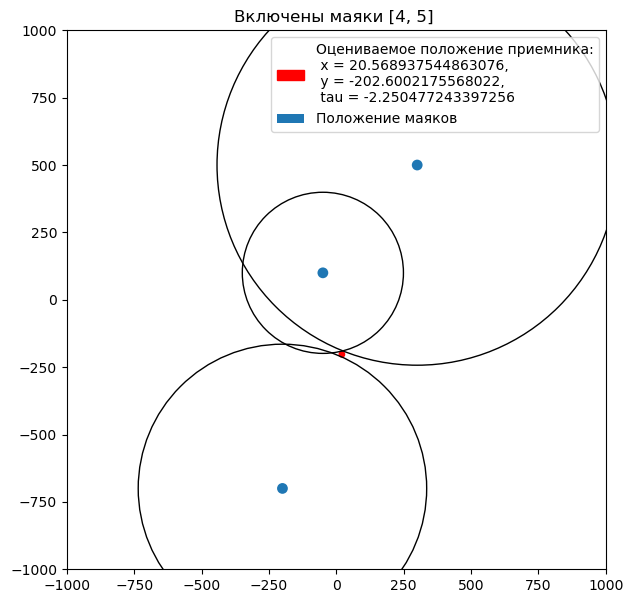

Оценка координат приемника: (x0= 24.15, y0= -203.44)


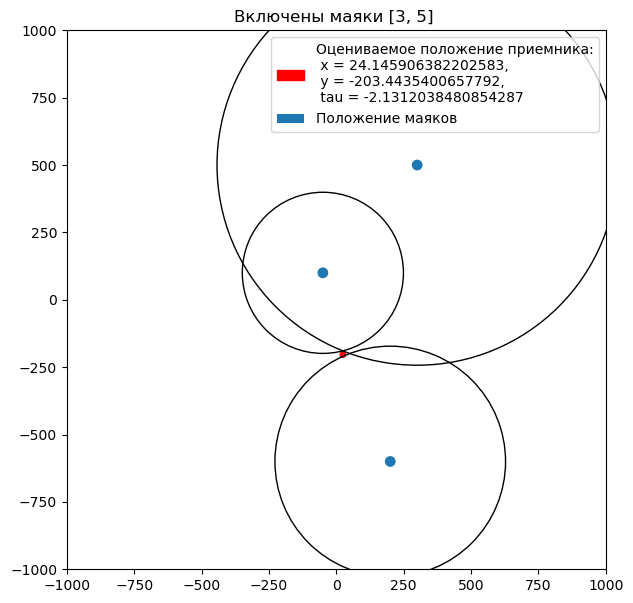

Оценка координат приемника: (x0= 25.11, y0= -113.38)


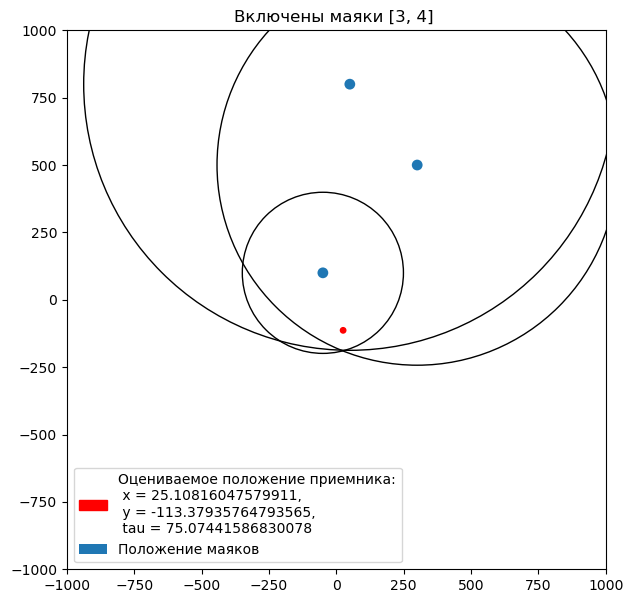

Оценка координат приемника: (x0= 22.55, y0= -203.93)


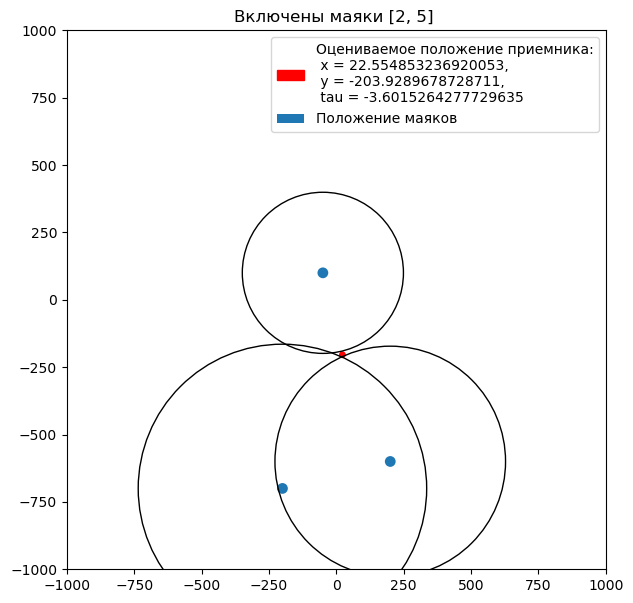

Оценка координат приемника: (x0= 43.07, y0= -201.72)


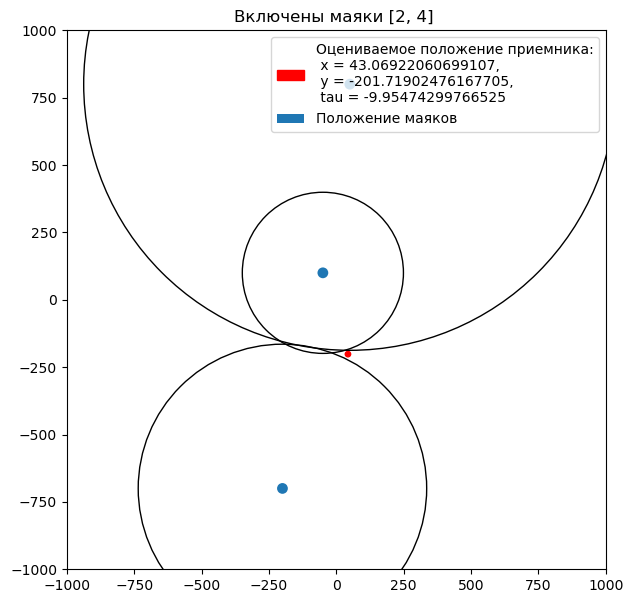

Оценка координат приемника: (x0= 26.32, y0= -204.96)


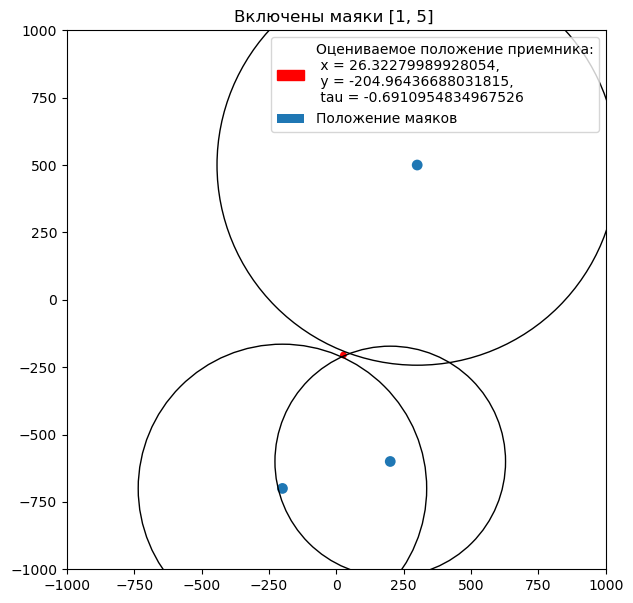

Оценка координат приемника: (x0= -8.44, y0= -190.64)


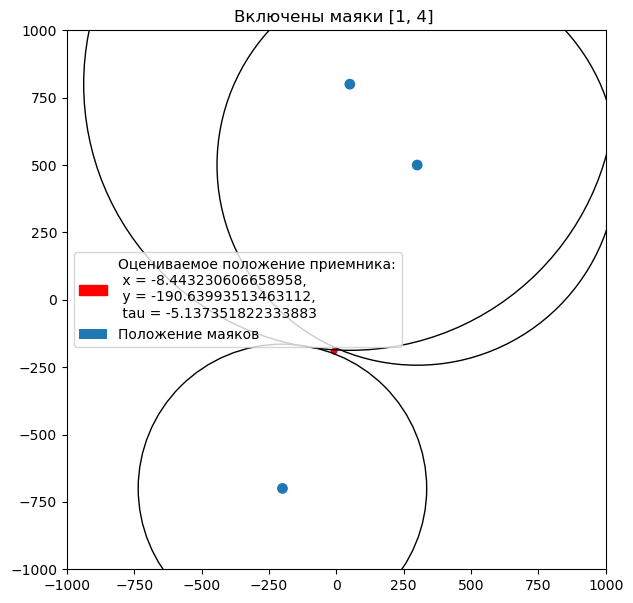

Оценка координат приемника: (x0= 24.82, y0= -198.24)


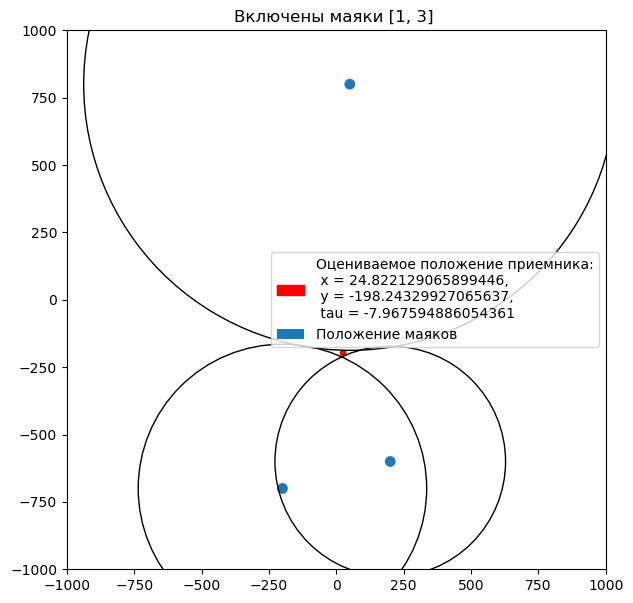

In [8]:
dist = np.array([ 298.9468,742.7760, 535.1911,427.8247, 987.5056])
cords = [(-50, 100), (300, 500), (-200, -700), (200, -600), (50, 800)]
x0,y0,tau = 1,1,1
est_vec = []
off=[[4,5],[3,5],[3,4],[2,5],[2,4],[1,5],[1,4],[1,3]]
dist2 = [[dist[0],dist[1],dist[2]],[dist[0],dist[1],dist[3]],[dist[0],dist[1],dist[4]],[dist[0],dist[2],dist[3]],[dist[0],dist[2],dist[4]],[dist[1],dist[2],dist[3]],[dist[1],dist[2],dist[4]], [dist[2],dist[3],dist[4]]]
cords2 = [[cords[0],cords[1],cords[2]],[cords[0],cords[1],cords[3]],[cords[0],cords[1],cords[4]],[cords[0],cords[2],cords[3]],[cords[0],cords[2],cords[4]],[cords[1],cords[2],cords[3]],[cords[1],cords[2],cords[4]], [cords[2],cords[3],cords[4]]]

def draw(est_vec=est_vec, cords=cords2, dist=dist2, off=off):    
    f, axes = plt.subplots()
    f.set_figwidth(7)
    f.set_figheight(7)
    axes.add_artist(plt.Circle((est_vec[0], est_vec[1]), 10, color='red')) #примерные координаты
    axes.set_xlim(-1000, 1000)
    axes.set_ylim(-1000, 1000)
    axes.set_aspect(1)
        
    for j in range(3):
        axes.add_artist(plt.Circle((cords[j][0], cords[j][1]), 20))
            
        cir = plt.Circle((cords[j][0], cords[j][1]), dist[j], fill=False)
        axes.add_artist(cir)
                    # Настройка пределов осей
    axes.set_title('Включены маяки {} '.format(off))

    axes.legend(['Оцениваемое положение приемника:\n x = {},\n y = {},\n tau = {} '.format(est_vec[0],est_vec[1],est_vec[2]),'Положение маяков'])

    plt.savefig('my_plots_two {}.png'.format(i))

    # Показать графики
    plt.show()
    return 0

def pred_coords(x0,y0,tau,dist,cords):
    t=len(dist)
    noise = np.random.normal(0,1,t)
    z,H = np.array([]),np.array([[]])

    for i in range(t):
        z=np.append(z,(dist[i]-(np.sqrt((cords[i][0]-x0)**2+(cords[i][1]-y0)**2))))
    z=np.array(z)+ noise #+ noise
    for i in range(t):
        dfx = (x0-cords[i][0])/(np.sqrt((cords[i][0]-x0)**2+(cords[i][1]-y0)**2))
        dfy = (y0-cords[i][1])/(np.sqrt((cords[i][0]-x0)**2+(cords[i][1]-y0)**2))
        H=np.append(H,[[dfx,dfy,tau]])
    
    H=H.reshape(t,-1)

    predict=inv(H.T@H)@H.T@z
    m=predict+np.array([x0,y0,tau])
    return m ,predict


for i in range(len(dist2)):
    est_n, pred = pred_coords(x0,y0,tau,dist2[i],cords2[i])
    est_vec.append(est_n)
    print("Оценка координат приемника: (x0= {:.2f}, y0= {:.2f})".format(est_n[0], est_n[1]))
    draw(est_vec[i], cords2[i], dist2[i],off[i])